# SkillCraft – Task 2: Customer Segmentation using K-Means Clustering

**Objective:**  
Group customers of a retail store into distinct segments based on their annual income and spending score, using the K-means clustering algorithm. This segmentation will help in creating targeted marketing strategies and improving customer engagement.

**Dataset:**  
Mall Customers dataset containing demographic details and purchase-related features:
- Customer ID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1–100)

**Deliverables:**  
- A clean, documented notebook with:
  - Data exploration and preprocessing
  - Optimal cluster determination using the Elbow Method
  - K-means clustering implementation
  - Cluster visualization and interpretation
- Insights on each cluster profile for business use.


In [ ]:
import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load data
df = pd.read_csv("Mall_Customers.csv")
print(df.shape)
df.head()


Saving Mall_Customers.csv to Mall_Customers (2).csv
(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()
df.describe()

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


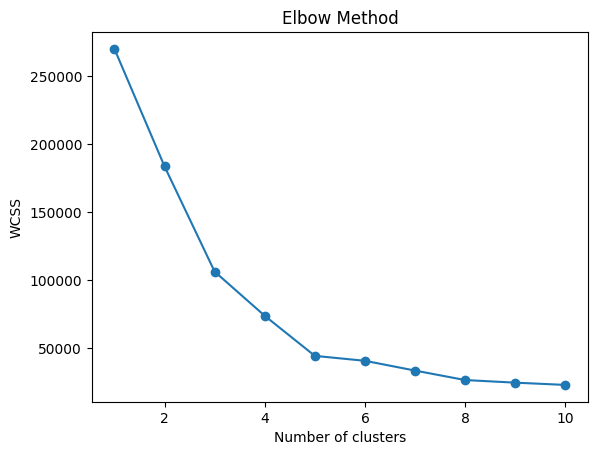

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df["Cluster"] = y_kmeans
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


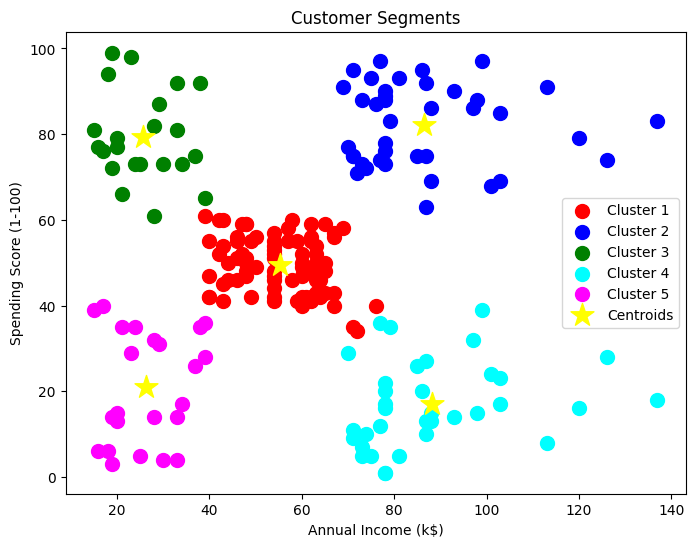

In [ ]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')


# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## Results

**Optimal number of clusters:** 5 (determined using the Elbow Method)

**Cluster Profiles:**
- **Cluster 1 (Red):** Average income – Average spending  
- **Cluster 2 (Blue):** High income – High spending  
- **Cluster 3 (Green):** Low income – High spending  
- **Cluster 4 (Cyan):** High income – Low spending  
- **Cluster 5 (Magenta):** Low income – Low spending  

**Centroids:**  
The yellow star markers in the plot represent the **centroids** — the average position of all data points within each cluster in the feature space.  
They act as the "center" of each customer segment and are used by the K-Means algorithm to assign customers to the nearest group.

**Insights:**  
- Customers in **Cluster 2** represent a high-value target group for premium products and loyalty programs.  
- **Cluster 3** could be engaged with affordable but aspirational offerings to encourage brand loyalty.  
- **Cluster 4** may require special promotions or relationship building to increase spending.  
- **Cluster 5** likely has limited spending capacity and may respond better to discounts or budget-friendly options.
